# Loan Interest Rate Prediction
This notebook utilizes Python and key libraries (Pandas, NumPy, scikit-learn, and Matplotlib) to analyze and predict loan interest rates based on a number of factors such as income level, purpose of the loan, FICO credit score, debt-to-income ratio

## Data
We will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money(investors).  
Link to dataset: https://www.kaggle.com/datasets/sahilnbajaj/loans-data

## Importance of Predicting Loan Interest Rates

Predicting loan interest rates is a critical aspect of financial decision-making for both lenders and borrowers. Lenders use interest rates to assess the risk of lending money to individuals, assigning higher rates to those deemed riskier based on factors like credit score, debt-to-income ratio, and income. For borrowers, understanding the factors that affect their interest rates can help them make informed financial decisions, like improving their creditworthiness before applying for a loan.

By building machine learning models to predict loan interest rates, financial institutions can:
- **Improve Risk Assessment**: More accurate predictions of interest rates can help institutions evaluate the likelihood of loan defaults, leading to better lending decisions.
- **Personalize Loan Offers**: With predictive models, lenders can offer more personalized interest rates to customers, improving customer satisfaction and competitiveness in the market.
- **Enhance Operational Efficiency**: Automation of the interest rate prediction process can reduce manual work, speeding up loan approval times and improving operational efficiency.

For borrowers, these models provide transparency into the loan approval process, helping them understand how their financial profile affects the interest rates they receive and what actions they can take to secure more favorable terms.



## Data Dictionary:
- **credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- **purpose**: The purpose of the loan (values: "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", "all_other").
- **int.rate**: The interest rate of the loan, as a proportion (e.g., a rate of 11% would be stored as 0.11). Borrowers judged as more risky are assigned higher interest rates.
- **installment**: The monthly installments owed by the borrower if the loan is funded.
- **log.annual.inc**: The natural log of the self-reported annual income of the borrower.
- **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- **fico**: The FICO credit score of the borrower.
- **days.with.cr.line**: The number of days the borrower has had a credit line.
- **revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.
- **delinq.2yrs**: The number of times the borrower has been 30+ days past due on a payment in the past 2 years.
- **pub.rec**: The borrower's number of derogatory public records (e.g., bankruptcy filings, tax liens, or judgments).

### Target Variable: **Interest Rate**

## Machine Learning Models Used:
- Random Forest
- Linear Regression
- Ridge Regression
- Gradient Boosting
- XG Boost

## Importing Our Tools

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

## Load and View Data

In [2]:
data = pd.read_csv('loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
len(data)

9578

In [4]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [5]:
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [6]:
zero=data[data['credit.policy']==0]
zero.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7710,0,debt_consolidation,0.1608,35.20,10.308953,23.84,642,2490.000000,10125,90.4,1,0,0,0
7711,0,debt_consolidation,0.1608,246.38,12.152144,22.47,647,7212.000000,150971,92.3,4,0,0,1
7712,0,debt_consolidation,0.1600,787.53,11.264464,19.34,682,3780.041667,15897,66.0,5,0,1,0
7713,0,educational,0.1640,126.40,10.308953,29.60,677,1643.000000,3043,58.5,1,0,0,1
7714,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.000000,26531,52.6,33,0,0,1
7715,0,debt_consolidation,0.1482,172.89,10.645425,18.51,652,4020.000000,9792,64.0,8,0,0,1
7716,0,debt_consolidation,0.1380,149.96,10.736397,16.70,662,4339.000000,314,12.6,4,1,0,0
7717,0,all_other,0.1482,311.20,11.394142,19.34,657,4139.958333,38329,77.3,0,0,0,1
7718,0,debt_consolidation,0.1703,570.69,11.355101,25.32,672,4149.958333,38781,54.5,3,0,0,0
7719,0,credit_card,0.1324,404.03,12.206073,21.31,697,5879.958333,152416,80.1,0,0,0,0


In [7]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


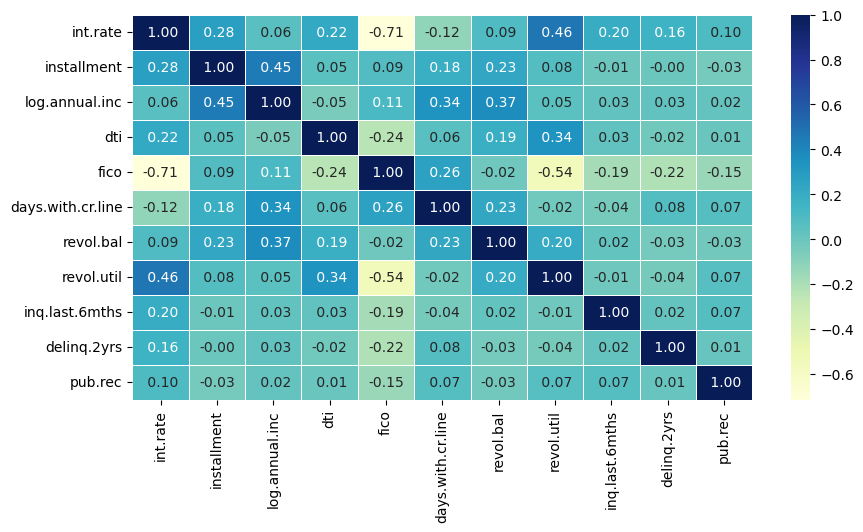

In [8]:
corr_matrix = data.iloc[:,2:-1].corr()
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt=" .2f", cmap="YlGnBu")

## 2. Modelling the Data

In [135]:
models = {'RandomForest': RandomForestRegressor(),
          'Linear Regression': LinearRegression(),
          'Ridge': Ridge(),
          'Lasso': Lasso(),
          'Gradient Boosting': GradientBoostingRegressor(),
          'XGBoost': XGBRegressor(),
          'CatBoost': CatBoostRegressor(verbose=0)}

In [10]:
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(models, X_train, X_test, y_train, y_test):
    model_scores={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        scores = {
                  'MAE': mean_absolute_error(y_test, preds),
                  'RMSLE': rmsle(y_test, preds),
                  'MSE': mean_squared_error(y_test, preds),
                  'R^2': r2_score(y_test, preds)}
        model_scores[name] = scores
    return model_scores

In [11]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [12]:
X = data.drop(['int.rate', 'credit.policy', 'revol.bal', 'installment'], axis=1)
X.head()

,purpose,log.annual.inc,dti,fico,days.with.cr.line,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,debt_consolidation,11.350407,19.48,737,5639.958333,52.1,0,0,0,0
1,credit_card,11.082143,14.29,707,2760.000000,76.7,0,0,0,0
2,debt_consolidation,10.373491,11.63,682,4710.000000,25.6,1,0,0,0
3,debt_consolidation,11.350407,8.10,712,2699.958333,73.2,1,0,0,0
4,credit_card,11.299732,14.97,667,4066.000000,39.5,0,1,0,0


In [13]:
y = data['int.rate']
y

0       0.1189
1       0.1071
2       0.1357
3       0.1008
4       0.1426
         ...  
9573    0.1461
9574    0.1253
9575    0.1071
9576    0.1600
9577    0.1392
Name: int.rate, Length: 9578, dtype: float64

In [14]:
worded_features = ['purpose']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   worded_features)],
                                   remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [136]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.20)

#smote = SMOTE()
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#X_train = X_train_resampled
#y_train = y_train_resampled

scores = show_scores(models, X_train, X_test, y_train, y_test)
mae_scores={}
for name in scores:
    print(name)
    print('MAE: ', scores[name]['MAE'])
    print('RMSLE: ', scores[name]['RMSLE'])
    print('MSE: ', scores[name]['MSE'])
    print('R^2: ', scores[name]['R^2'])
    print('\n')
    mae_scores[name] = scores[name]['MAE']

RandomForest
MAE:  0.012167591336116914
RMSLE:  0.014139267224485672
MSE:  0.00025326426748903977
R^2:  0.6321111138769019


Linear Regression
MAE:  0.012961054924890886
RMSLE:  0.014898606979911787
MSE:  0.00028095682952898284
R^2:  0.5918852031956395


Ridge
MAE:  0.012960841595523001
RMSLE:  0.014898337897482088
MSE:  0.0002809472621618891
R^2:  0.5918991006477283


Lasso
MAE:  0.020832114373551203
RMSLE:  0.023209336865915038
MSE:  0.0006804792338300006
R^2:  0.011543358067865328


Gradient Boosting
MAE:  0.011754788641554182
RMSLE:  0.013610815036612656
MSE:  0.00023465762305629385
R^2:  0.6591389206919618


XGBoost
MAE:  0.012238273281524725
RMSLE:  0.01438379426797187
MSE:  0.0002623302971889597
R^2:  0.6189418989658138


CatBoost
MAE:  0.011717247500704651
RMSLE:  0.013718658797822048
MSE:  0.00023855610052915893
R^2:  0.6534760352431475




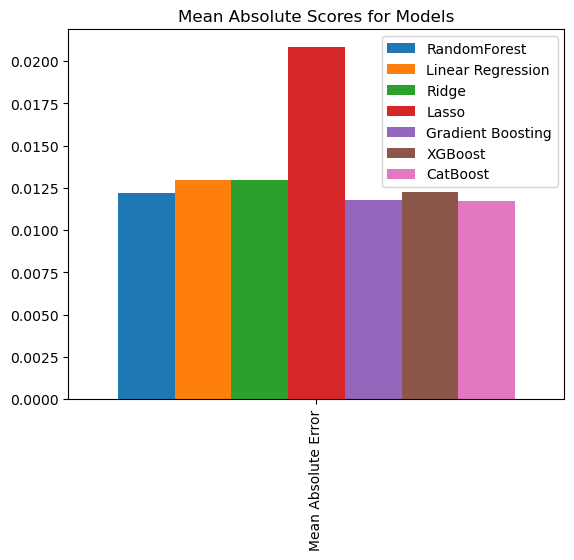

In [138]:
comparison = pd.DataFrame(mae_scores, index=["Mean Absolute Error"])
comparison.plot.bar(width=2);
plt.title("Mean Absolute Scores for Models");

## 3. Hypertuning Parameters

#### Tuning Random Forest

In [151]:
def show_tuned_scores(model, X_test, y_test, name):
    model_scores={}
    preds = model.predict(X_test)
    scores = {
                'MAE': mean_absolute_error(y_test, preds),
                'RMSLE': rmsle(y_test, preds),
                'MSE': mean_squared_error(y_test, preds),
                'R^2': r2_score(y_test, preds)}
    model_scores[name] = scores
    return model_scores

In [124]:
rf_params = {
    'n_estimators': [200, 300, 400, 500],  
    'max_depth': [None, 5, 7, 9], 
    'min_samples_split': [2, 3, 5],  
    'min_samples_leaf': [1, 2, 5, 10],  
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True, False] 
}

In [119]:
np.random.seed(42)
rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=rf_params,
                               n_iter=10, cv=5, verbose=True)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 7, 9],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [200, 300, 400, 500]},
                   verbose=True)

In [120]:
rf.best_params_

{'n_estimators': 300,
 'min_samples_split': 3,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [123]:
scores['RandomForest']

{'MAE': 0.012167591336116914,
 'RMSLE': 0.014139267224485672,
 'MSE': 0.00025326426748903977,
 'R^2': 0.6321111138769019}

In [121]:
show_tuned_scores(rf, X_train, X_test, y_train, y_test, name='Tuned Random Forest')

{'Tuned Random Forest': {'MAE': 0.011990742258314906,
  'RMSLE': 0.013878135104585678,
  'MSE': 0.0002441278140598202,
  'R^2': 0.6453826255216963}}

#### Tuning Linear Regression

In [104]:
lr_params = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

In [113]:
np.random.seed(42)
lr = GridSearchCV(LinearRegression(), lr_params, cv=5)
lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 5, 10, 15, None],
                         'positive': [True, False]})

In [114]:
lr.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': False}

In [115]:
show_tuned_scores(lr, X_train, X_test, y_train, y_test, name='Tuned Linear Regresssion')

{'Tuned Linear Regresssion': {'MAE': 0.012961054924910344,
  'RMSLE': 0.01489860697992129,
  'MSE': 0.0002809568295293455,
  'R^2': 0.5918852031951127}}

#### Tuning Ridge Regression

In [132]:
np.random.seed(42)
ridge_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]}
ridge = GridSearchCV(Ridge(), ridge_grid)
ridge.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]})

In [133]:
ridge.best_params_

{'alpha': 10}

In [134]:
scores['Ridge']

{'MAE': 0.012960841595523001,
 'RMSLE': 0.014898337897482088,
 'MSE': 0.0002809472621618891,
 'R^2': 0.5918991006477283}

In [126]:
show_tuned_scores(ridge, X_train, X_test, y_train, y_test, name='Tuned Ridge Regresssion')

{'Tuned Ridge Regresssion': {'MAE': 0.01295895642293433,
  'RMSLE': 0.01489620119996667,
  'MSE': 0.0002808720220110788,
  'R^2': 0.592008393662285}}

#### Tuning Gradient Boosting

In [125]:
gb_params = {
    'n_estimators': np.arange(100, 501, 50),  
    'learning_rate': np.linspace(0.01, 0.1, 5),  
    'max_depth': np.arange(2, 6),  
    'subsample': np.linspace(0.6, 1.0, 5), 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]
}

In [114]:
np.random.seed(42)
gb = RandomizedSearchCV(GradientBoostingRegressor(), gb_params, n_iter=10, cv=5)
gb.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': array([0.01  , 0.0325, 0.055 , 0.0775, 0.1   ]),
                                        'max_depth': array([2, 3, 4, 5]),
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500]),
                                        'subsample': array([0.6, 0.7, 0.8, 0.9, 1. ])})

In [115]:
gb.best_params_

{'subsample': 0.8,
 'n_estimators': 450,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 3,
 'learning_rate': 0.05500000000000001}

In [116]:
scores['Gradient Boosting']

{'MAE': 0.011754788641554182,
 'RMSLE': 0.013610815036612656,
 'MSE': 0.00023465762305629385,
 'R^2': 0.6591389206919618}

In [117]:
show_tuned_scores(gb, X_train, X_test, y_train, y_test, name='Tuned Gradient Boosting')

{'Tuned Gradient Boosting': {'MAE': 0.011655610446973275,
  'RMSLE': 0.013571226042064255,
  'MSE': 0.00023325639844896164,
  'R^2': 0.6611743241269215}}

#### Tuning XG Boost

In [106]:
xgb_params = {
  'n_estimators': [100, 200, 300, 500], 
    'learning_rate': [0.01, 0.05, 0.08, 0.1],
    'max_depth': [1, 3, 5, 7], 
    'subsample': [0.5, 0.7, 0.8, 1.0], 
    'colsample_bytree': [0.8, 1.0], 
    'gamma': [0, 0.1, 0.5],  
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.5, 1, 1.5, 2],
    'min_child_weight': [1,3,5]
}

In [107]:
np.random.seed(42)
xgb = RandomizedSearchCV(XGBRegressor(), xgb_params, n_iter=20,cv=5)
xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 0.1, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.08,
                                                          0.1],
                                        'max_depth': [1, 3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 500],
                                        'reg_alpha': [0, 0.1, 0.5, 1],
                                        'reg_lambda': [0.5, 1, 1.5, 2],
                                        'subsample': [0.5, 0.7, 0.8, 1.0]})

In [108]:
xgb.best_params_

{'subsample': 0.8,
 'reg_lambda': 0.5,
 'reg_alpha': 0,
 'n_estimators': 300,
 'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0,
 'colsample_bytree': 1.0}

In [109]:
scores['XGBoost']

{'MAE': 0.012238273281524725,
 'RMSLE': 0.01438379426797187,
 'MSE': 0.0002623302971889597,
 'R^2': 0.6189418989658138}

In [142]:
show_tuned_scores(xgb, X_train, X_test, y_train, y_test, name='Tuned XG Boosting')

{'Tuned XG Boosting': {'MAE': 0.01164483035892435,
  'RMSLE': 0.01350813128053973,
  'MSE': 0.00023116693938943784,
  'R^2': 0.6642094493486084}}

#### Tuning CatBoost

In [146]:
cat_params = {'iterations': [500, 1000],        
              'learning_rate': [0.01, 0.05, 0.1],   
              'depth': [4, 6, 8],             
              'l2_leaf_reg': [3, 5, 7],       
              'bagging_temperature': [0.1, 0.5, 1.0],  
              'random_strength': [1, 2, 5],  
              'min_data_in_leaf': [1, 5, 10], 
              'border_count': [32, 64, 128],
              'subsample': [0.8, 1.0] }

In [147]:
np.random.seed(42)
cat = RandomizedSearchCV(CatBoostRegressor(verbose=0), cat_params, n_iter=20, cv=5)
cat.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000015D9095C1A0>,
                   n_iter=20,
                   param_distributions={'bagging_temperature': [0.1, 0.5, 1.0],
                                        'border_count': [32, 64, 128],
                                        'depth': [4, 6, 8],
                                        'iterations': [500, 1000],
                                        'l2_leaf_reg': [3, 5, 7],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'min_data_in_leaf': [1, 5, 10],
                                        'random_strength': [1, 2, 5],
                                        'subsample': [0.8, 1.0]})

In [148]:
cat.best_params_

{'subsample': 1.0,
 'random_strength': 1,
 'min_data_in_leaf': 1,
 'learning_rate': 0.05,
 'l2_leaf_reg': 7,
 'iterations': 500,
 'depth': 6,
 'border_count': 128,
 'bagging_temperature': 0.5}

In [149]:
scores['CatBoost']

{'MAE': 0.011717247500704651,
 'RMSLE': 0.013718658797822048,
 'MSE': 0.00023855610052915893,
 'R^2': 0.6534760352431475}

In [152]:
show_tuned_scores(cat, X_test, y_test, name='Tuned Cat Boost')

{'Tuned Cat Boost': {'MAE': 0.01162146440439043,
  'RMSLE': 0.0135618238906265,
  'MSE': 0.0002329854238134345,
  'R^2': 0.6615679388986382}}